C:\Users\sopor\AppData\Local\Temp\ipykernel_3776\3316548263.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_work["Employment_Type"] = df_work["Employment_Type"].replace({"Remote": 1, "In-Office": 2})


Descripcion del Conjunto de Datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Employee_ID            1000 non-null   int64
 1   Employment_Type        1000 non-null   int64
 2   Hours_Worked_Per_Week  1000 non-null   int64
 3   Productivity_Score     1000 non-null   int64
 4   Well_Being_Score       1000 non-null   int64
dtypes: int64(5)
memory usage: 39.2 KB
None

Estadísticas Descriptivas:
       Employee_ID  Employment_Type  Hours_Worked_Per_Week  \
count  1000.000000       1000.00000            1000.000000   
mean    500.500000          1.51000              39.720000   
std     288.819436          0.50015               8.042779   
min       1.000000          1.00000              16.000000   
25%     250.750000          1.00000              34.750000   
50%     500.500000          2.00000              40.000000   
75% 

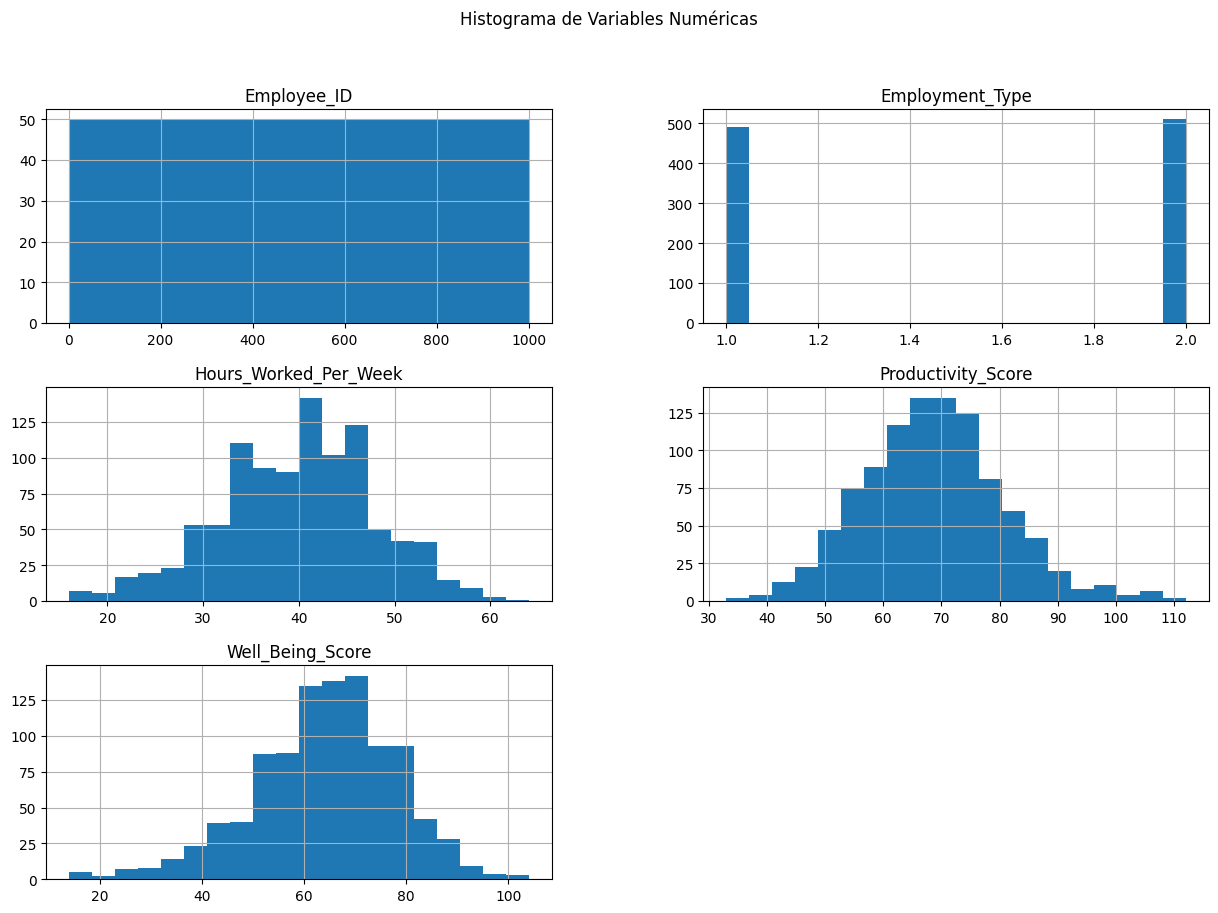


Identificación de Outliers con Boxplot:


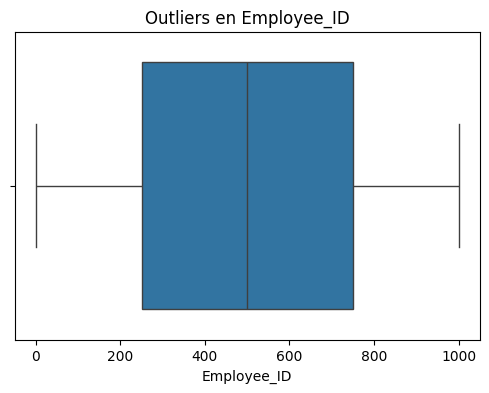

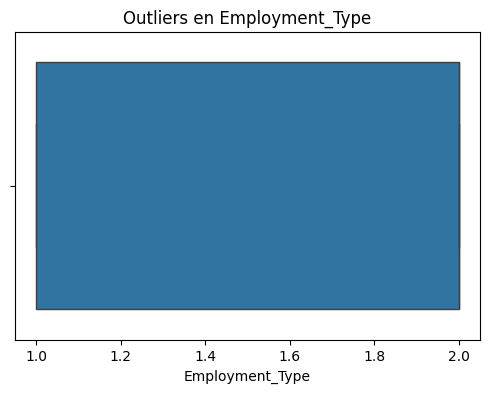

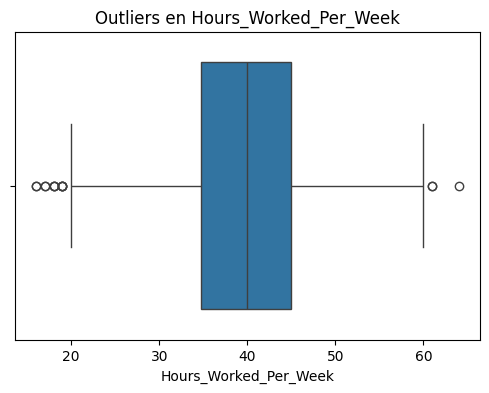

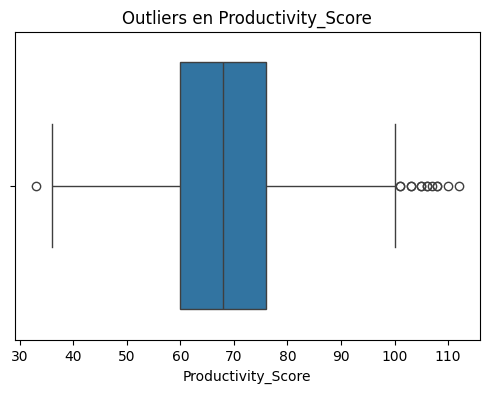

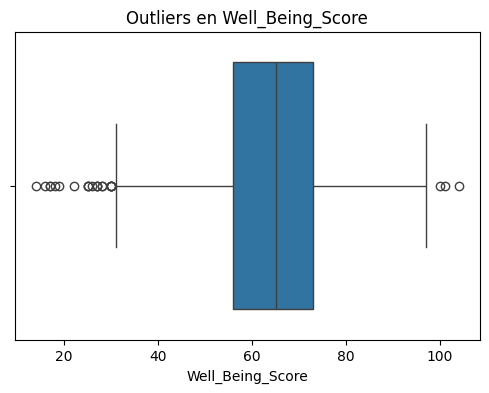


Mapa de Calor de Correlaciones:


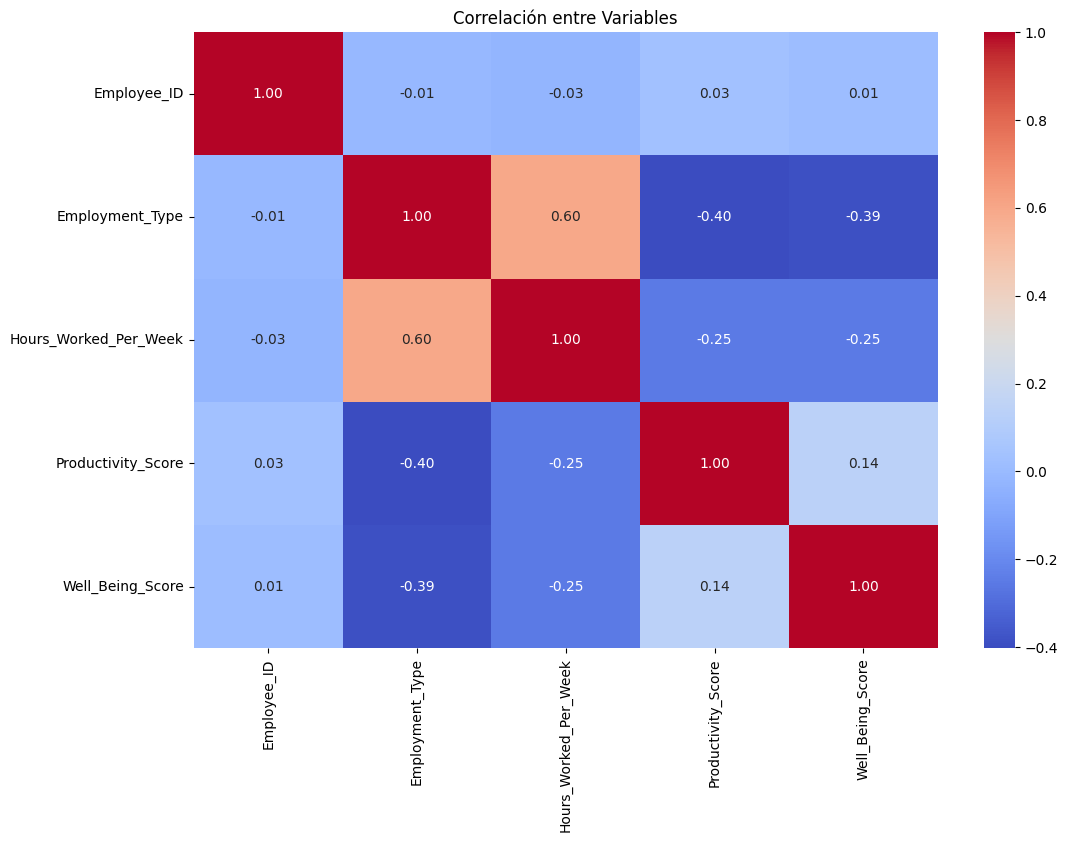


Valores Nulos:
Employee_ID              0
Employment_Type          0
Hours_Worked_Per_Week    0
Productivity_Score       0
Well_Being_Score         0
dtype: int64

Identificación de Outliers:
Número de outliers en cada columna: Employee_ID              0
Employment_Type          0
Hours_Worked_Per_Week    1
Productivity_Score       7
Well_Being_Score         0
dtype: int64


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from io import StringIO

# Cargar el dataset
df_work = pd.read_csv("C:/Users/sopor/Desktop/Curso Coding Dojo/Machine Learning/Proyecto 2/Remote Work/remote_work_productivity.csv")

df_work["Employment_Type"] = df_work["Employment_Type"].replace({"Remote": 1, "In-Office": 2})

# Función para realizar un analisis exploratorio inicial
def eda_inicial(df_work):
    # Descripción del conjunto de datos
    # Información general sobre el dataset
    print("Descripcion del Conjunto de Datos:")
    print(df_work.info())  
    # Estadisticas descriptivas basicas
    print("\nEstadísticas Descriptivas:")
    print(df_work.describe())  

    # Analisis de variables categoricas y valores unicos
    print("\nDistribucion de Variables Categoricas:")
    print(df_work.select_dtypes(include='object').nunique())  

    # Visualizaciones
    print("\nVisualizaciones:")
    # Histograma para variables numericas
    df_work.hist(bins=20, figsize=(15, 10))
    plt.suptitle("Histograma de Variables Numéricas")
    plt.show()

    # Grafico de barras para variables categoricas
    for column in df_work.select_dtypes(include='object'):
        plt.figure(figsize=(10, 6))
        df_work[column].value_counts().plot(kind='bar')
        plt.title(f"Distribución de {column}")
        plt.show()

    # Boxplot para detectar outliers
    print("\nIdentificación de Outliers con Boxplot:")
    for col in df_work.columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df_work[col])
        plt.title(f"Outliers en {col}")
        plt.show()
  

    # Mapa de calor para ver correlaciones
    print("\nMapa de Calor de Correlaciones:")
    plt.figure(figsize=(12, 8))
    sns.heatmap(df_work.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlación entre Variables")
    plt.show()

    # Identificacion de valores nulos y mostrar cantidad
    print("\nValores Nulos:")
    print(df_work.isnull().sum())  
    
    # Identificacion de outliers utilizando Z-score y eliminacion de NaN
    print("\nIdentificación de Outliers:")
    # Filtrar solo columnas numéricas para Z-score
    numeric_columns = df_work.select_dtypes(include='number').columns
    
    # Eliminar filas con NaN y calcular el Z-score solo para columnas numericas
    z_scores = stats.zscore(df_work[numeric_columns].dropna())  
    # Contar los outliers
    outliers = (z_scores > 3).sum(axis=0)  
    print(f"Número de outliers en cada columna: {outliers}")

    # Funcion para guardar los hallazgos en un archivo
def guardar_hallazgos(hallazgos, filename="hallazgos_eda.txt"):
    with open(filename, 'w') as f:
        f.write(hallazgos)

# Funcion para capturar la informacion del dataset y guardarla en un archivo
def realizar_eda(df_work):
    # Realizar el analisis exploratorio
    eda_inicial(df_work)

    # Guardar los hallazgos en un archivo
    hallazgos = "Este es un ejemplo de los hallazgos del EDA.\n"
    
    # Capturar descripcion del dataset y estadísticas descriptivas
    str_io = StringIO()
    
    # Salida de dataset.info()
    df_work.info(buf=str_io)  
    hallazgos += f"Descripción del dataset:\n{str_io.getvalue()}\n"

    hallazgos += f"Estadísticas descriptivas:\n{df_work.describe()}\n"
    
    # Guardar en archivo
    guardar_hallazgos(hallazgos)

# Llamada de la función
realizar_eda(df_work)
